In [82]:
# import pandas module 
import pandas as pd 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'

In [124]:
movies_df = pd.read_pickle("movies_tmdb.pkl")

In [125]:
# Keep only non-zero budget and revenue rows.
movies_df = movies_df.query('budget > 0 and revenue > 0')
print(movies_df.shape)
movies_df.head(2)

# Cleaning : 

def traitement_variable(ligne_variable):
    genres = []
    for i in ligne_variable:
        genres.append(i["name"])    
    return genres

movies_df["genres"] = movies_df["genres"].apply(traitement_variable)
movies_df["production_countries"] = movies_df["production_countries"].apply(traitement_variable)
movies_df["production_companies"] = movies_df["production_companies"].apply(traitement_variable)

# Remove columns
movies_df=movies_df.drop(columns =['adult','backdrop_path', 'belongs_to_collection', 'homepage', 'id', 'imdb_id', 
                                  'original_title','overview','poster_path', 'status', 'video'])


(4974, 25)


In [126]:
movies_df

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,3424.983,"[20th Century Fox, Ingenious Media, Dune Enter...","[United States of America, United Kingdom]",2009-12-15,2920357254,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Enter the world of Pandora.,Avatar,7.542,27004
3,123000000,"[Family, Comedy, Fantasy]",en,365.805,"[Imagine Entertainment, Universal Pictures, LU...","[Germany, United States of America]",2000-11-15,345823040,104,"[{'english_name': 'English', 'iso_639_1': 'en'...",He puts the mean in green.,How the Grinch Stole Christmas,6.737,6243
5,180000000,"[Adventure, Family, Fantasy]",en,385.081,"[Walt Disney Pictures, Walden Media, C.S. Lewi...","[United Kingdom, United States of America]",2005-12-07,745013115,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Evil Has Reigned For 100 Years...,"The Chronicles of Narnia: The Lion, the Witch ...",7.102,8977
6,130000000,"[Action, Animation, Adventure, Comedy, Family]",en,246.402,[DreamWorks Animation],[United States of America],2011-10-28,554987477,90,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Live for danger. Fight for justice. Pray for m...,Puss in Boots,6.424,2788
8,30000000,"[Comedy, Fantasy]",en,160.797,"[Orion Pictures, Scott Rudin Productions]",[United States of America],1991-11-22,191502426,102,"[{'english_name': 'English', 'iso_639_1': 'en'...",Weird Is Relative,The Addams Family,7.024,3852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,19250000,"[Mystery, Action, Drama, Thriller, Crime]",en,10.427,"[Epsilon Motion Pictures, Franchise Pictures, ...","[Germany, United States of America]",2004-03-12,8112712,102,"[{'english_name': 'English', 'iso_639_1': 'en'...",She's missing,Spartan,6.200,296
9993,15000000,[Drama],da,13.303,[Zentropa Entertainments],"[Denmark, Sweden]",2010-08-26,13004198,118,"[{'english_name': 'Georgian', 'iso_639_1': 'ka...",,In a Better World,7.133,349
9994,14734000,"[Action, Drama, History, Romance]",fr,9.678,[Paradis Films],"[France, Germany]",2010-11-03,6775121,139,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Love. Conflict. Betrayal.,The Princess of Montpensier,6.378,237
9996,18000000,"[Drama, Romance]",en,8.427,"[Universal Pictures, Stuber Productions, Camp ...","[Canada, United Kingdom, United States of Amer...",2009-09-18,36133014,109,"[{'english_name': 'English', 'iso_639_1': 'en'...",Sometimes when you least expect it...,Love Happens,5.916,574


In [20]:
#Statistiques descriptives des variables quantitatives
movies_df_quanti = movies_df[['revenue','budget','runtime','popularity','vote_average','vote_count']]
movies_df_quanti.describe()

,revenue,budget,runtime,popularity,vote_average,vote_count
count,4.974000e+03,4.974000e+03,4974.000000,4974.000000,4974.000000,4974.000000
mean,9.319040e+07,3.194401e+07,109.555086,23.981217,6.532609,2132.472256
std,1.623132e+08,3.864073e+07,20.720990,51.778598,0.806128,3213.418697
min,1.000000e+00,5.000000e+00,5.000000,5.918000,1.800000,2.000000
25%,1.153029e+07,7.000000e+06,95.000000,13.134250,6.017000,405.000000
50%,3.768506e+07,1.980000e+07,105.000000,17.798500,6.547500,975.000000
75%,1.039066e+08,4.000000e+07,120.000000,26.363250,7.100000,2417.250000
max,2.920357e+09,3.800000e+08,254.000000,3424.983000,8.716000,32780.000000


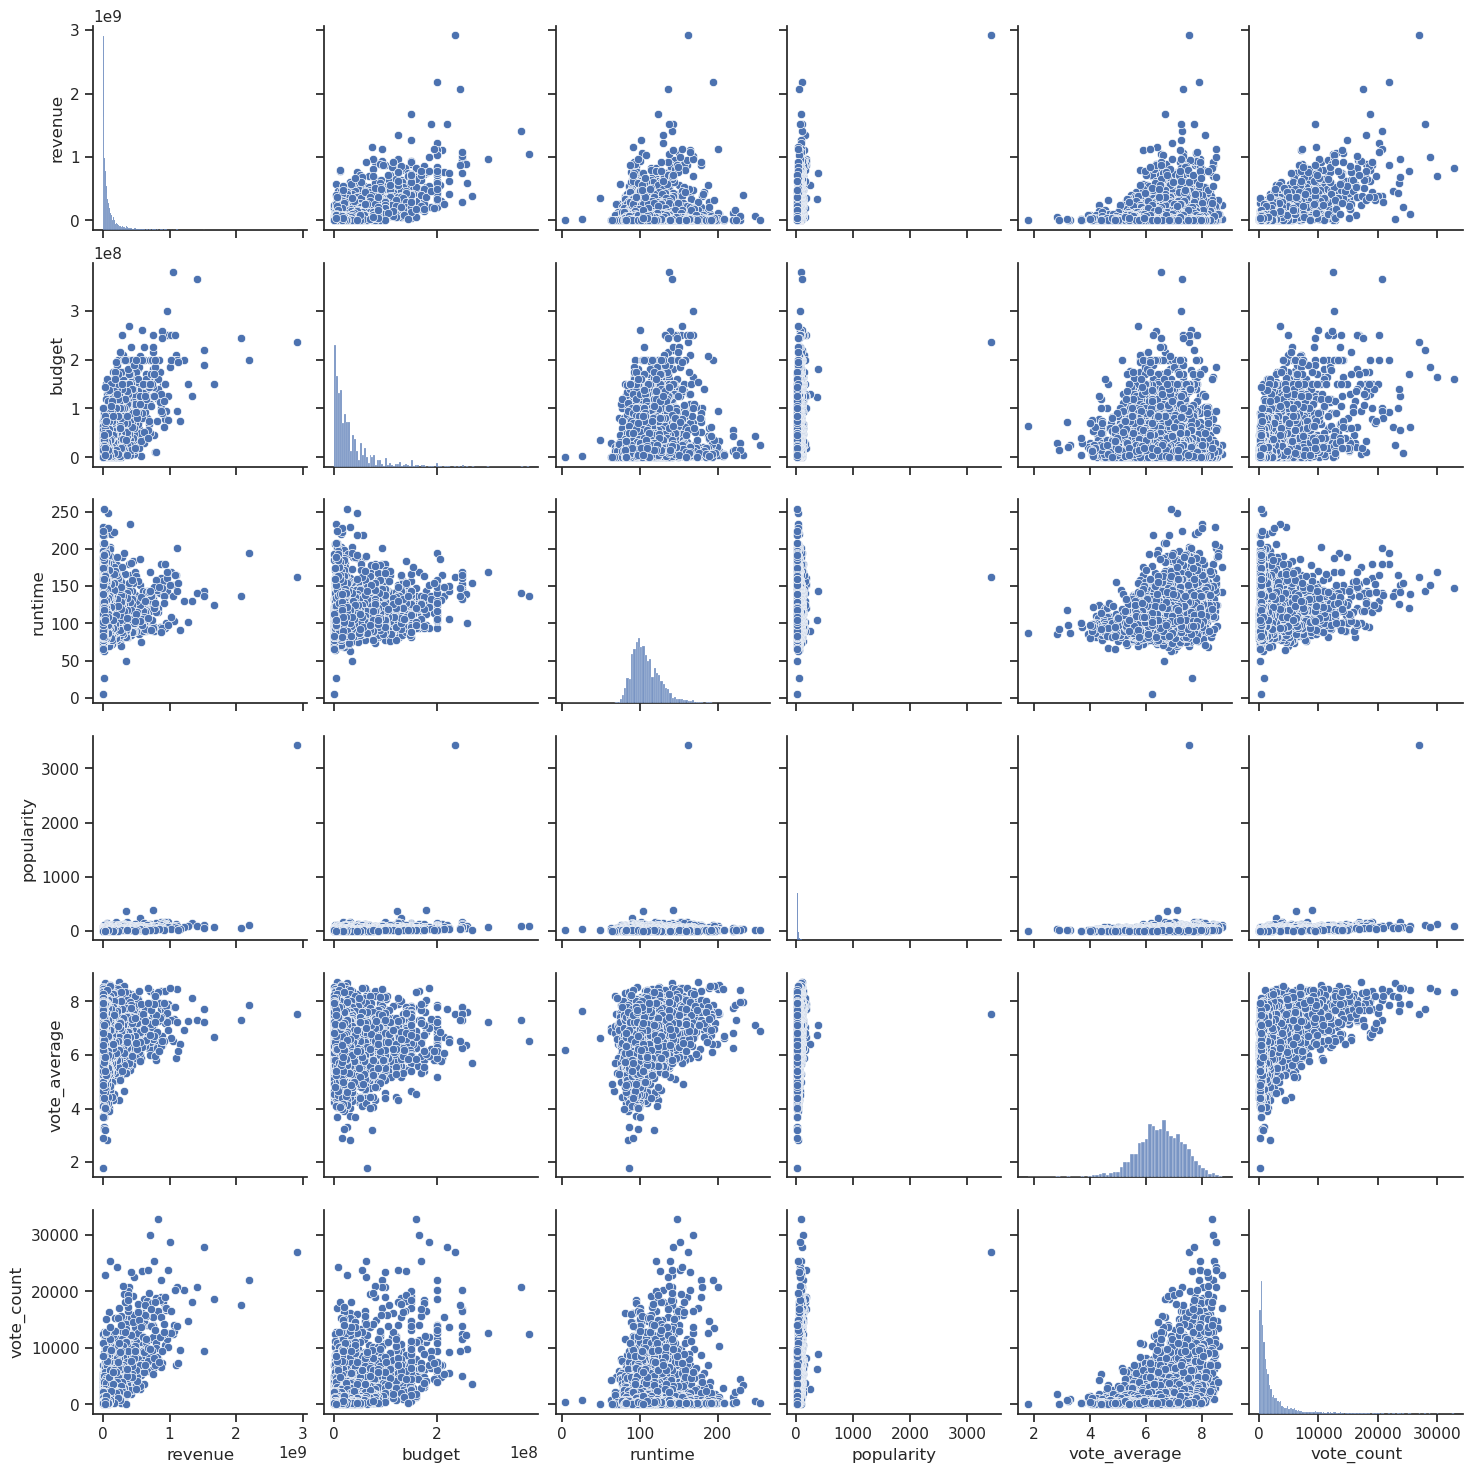

In [21]:
# Liens entre les variables quantitatives
sns.set(style="ticks", color_codes=True)
sns.pairplot(movies_df_quanti)
plt.show()

Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques des films\n')

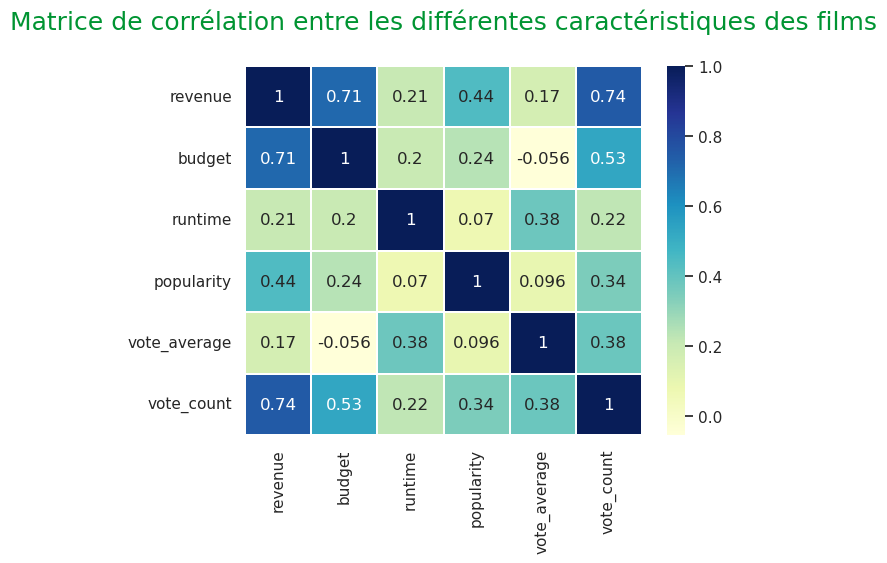

In [53]:
#Matrice de corrélation entre les différentes caractéristiques (quantitatives) des films

sns.heatmap(movies_df_quanti.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);
plt.title("Matrice de corrélation entre les différentes caractéristiques des films\n", fontsize=18, color='#009432')

#On voit que le plus gros coefficient correspond à la corrélation entre recette et budget

Text(0.5, 1.0, 'Recette en fonction du budget')

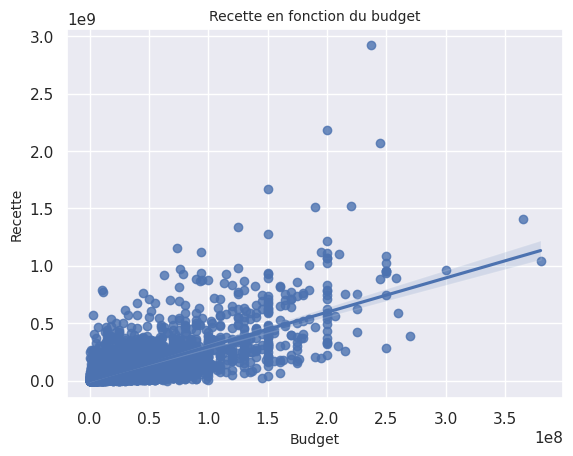

In [51]:
#Focus sur le graphique qui nous parait le plus intéressant : Lien entre recette et budget

sns.regplot(data = movies_df, x = movies_df['budget'], y=movies_df['revenue'])
plt.xlabel("Budget", fontsize=10)  
plt.ylabel("Recette", fontsize=10)
plt.title("Recette en fonction du budget", fontsize=10)


30


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1000 with 0 Axes>

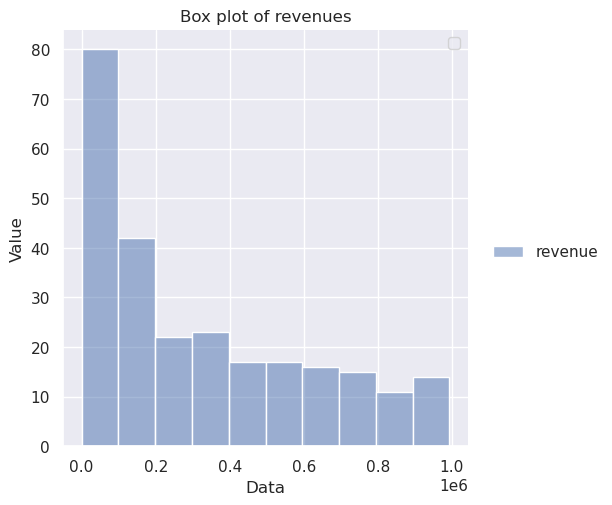

In [70]:
#Distribution recette à revoir
revenue_df = movies_df[['title', 'revenue']].sort_values('revenue')
print(len(revenue_df[revenue_df.revenue<2e4]))
revenue_boxplot = revenue_df[['revenue']][revenue_df.revenue < 1e6]
plt.figure(figsize=(20,10))
sns.displot(revenue_boxplot)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Box plot of revenues')
plt.legend()
plt.show()

35


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1000 with 0 Axes>

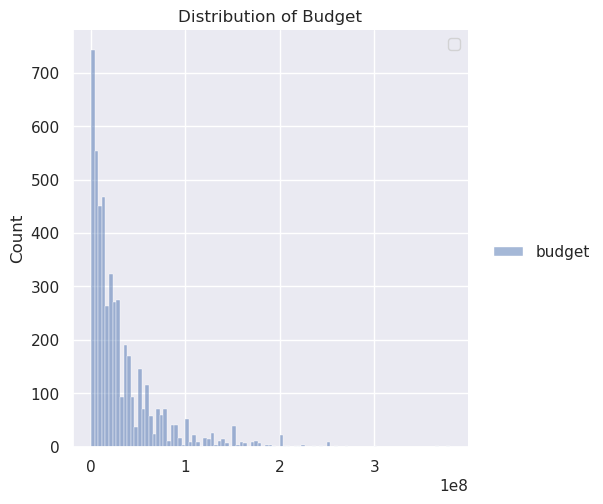

In [74]:
#Distribution budget à revoir
budget_df = movies_df[['title', 'budget']].sort_values('budget')
print(len(budget_df[budget_df.budget<1e5]))
budget_boxplot = budget_df[['budget']][budget_df.budget < 1e9]
plt.figure(figsize=(20,10))
sns.displot(budget_boxplot)
plt.title('Distribution of Budget')
plt.legend()
plt.show()


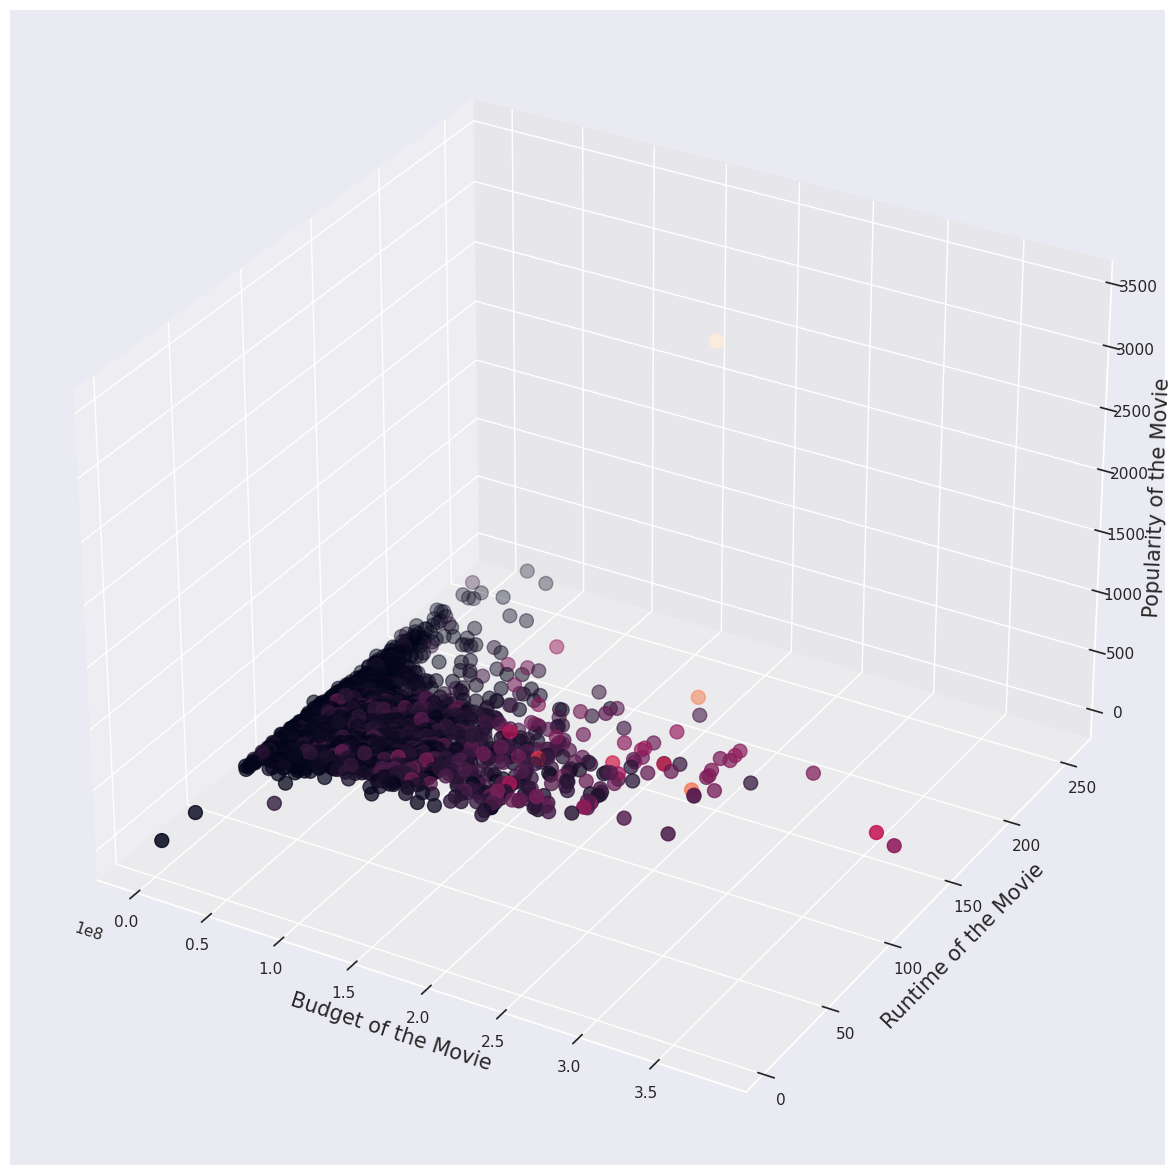

In [68]:
#Le graphique en 3 dimensions, j'ai pas compris, c = df ??

fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111,projection = '3d')
ax.scatter(movies_df['budget'],movies_df['runtime'],movies_df['popularity'], c = movies_df['revenue'], marker = 'o', s = 100)
ax.set_xlabel('Budget of the Movie',fontsize=15)
ax.set_ylabel('Runtime of the Movie',fontsize=15)
ax.set_zlabel('Popularity of the Movie',fontsize=15)
plt.show()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,date,year,day,month
45,1000000,"[Action, Romance, Animation]",ja,108.218,[Aniplex],[Japan],2014-12-06,16500000,114,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",,The Last: Naruto the Movie,7.853,1428,2014-12-06,2014,6,12
83,5000000,"[Action, Animation, Science Fiction]",ja,86.321,"[20th Century Fox, Toei Animation, Toei Compan...","[Japan, United States of America]",2015-04-18,61768190,93,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",,Dragon Ball Z: Resurrection 'F',6.813,1562,2015-04-18,2015,18,4
84,19000000,"[Animation, Family, Fantasy]",ja,105.131,[Studio Ghibli],[Japan],2001-07-20,274925095,125,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",,Spirited Away,8.540,13669,2001-07-20,2001,20,7
95,24000000,"[Fantasy, Animation, Adventure]",ja,81.968,"[Tokuma Shoten, Tohokushinsha Film Corporation...",[Japan],2004-09-09,236049757,119,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",The two lived there.,Howl's Moving Castle,8.404,7825,2004-09-09,2004,9,9
162,10000005,"[Action, Comedy]",cn,86.749,"[Star Overseas, Universe Entertainment]",[Hong Kong],2001-07-05,42776760,113,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Get ready to kick some grass!,Shaolin Soccer,7.057,1803,2001-07-05,2001,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,900000,[Drama],fr,10.635,"[Rome Paris Films, Les Films Concordia, Compag...","[France, Italy]",1963-10-29,528428,103,"[{'english_name': 'English', 'iso_639_1': 'en'...","More Bold! More Brazen! And Much, Much More Ba...",Contempt,7.100,654,1963-10-29,1963,29,10
9898,4437508,"[Drama, Romance, Comedy]",hi,11.138,"[UTV Motion Pictures, Ishana Movies]",[India],2012-09-13,2804874,151,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",,Barfi!,7.494,261,2012-09-13,2012,13,9
9899,1400000,"[Action, Thriller, Crime]",hi,7.888,"[Anurag Kashyap Films, Jar Pictures]",[India],2012-06-22,4100000,160,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",,Gangs of Wasseypur - Part 1,7.153,284,2012-06-22,2012,22,6
9993,15000000,[Drama],da,13.303,[Zentropa Entertainments],"[Denmark, Sweden]",2010-08-26,13004198,118,"[{'english_name': 'Georgian', 'iso_639_1': 'ka...",,In a Better World,7.133,349,2010-08-26,2010,26,8


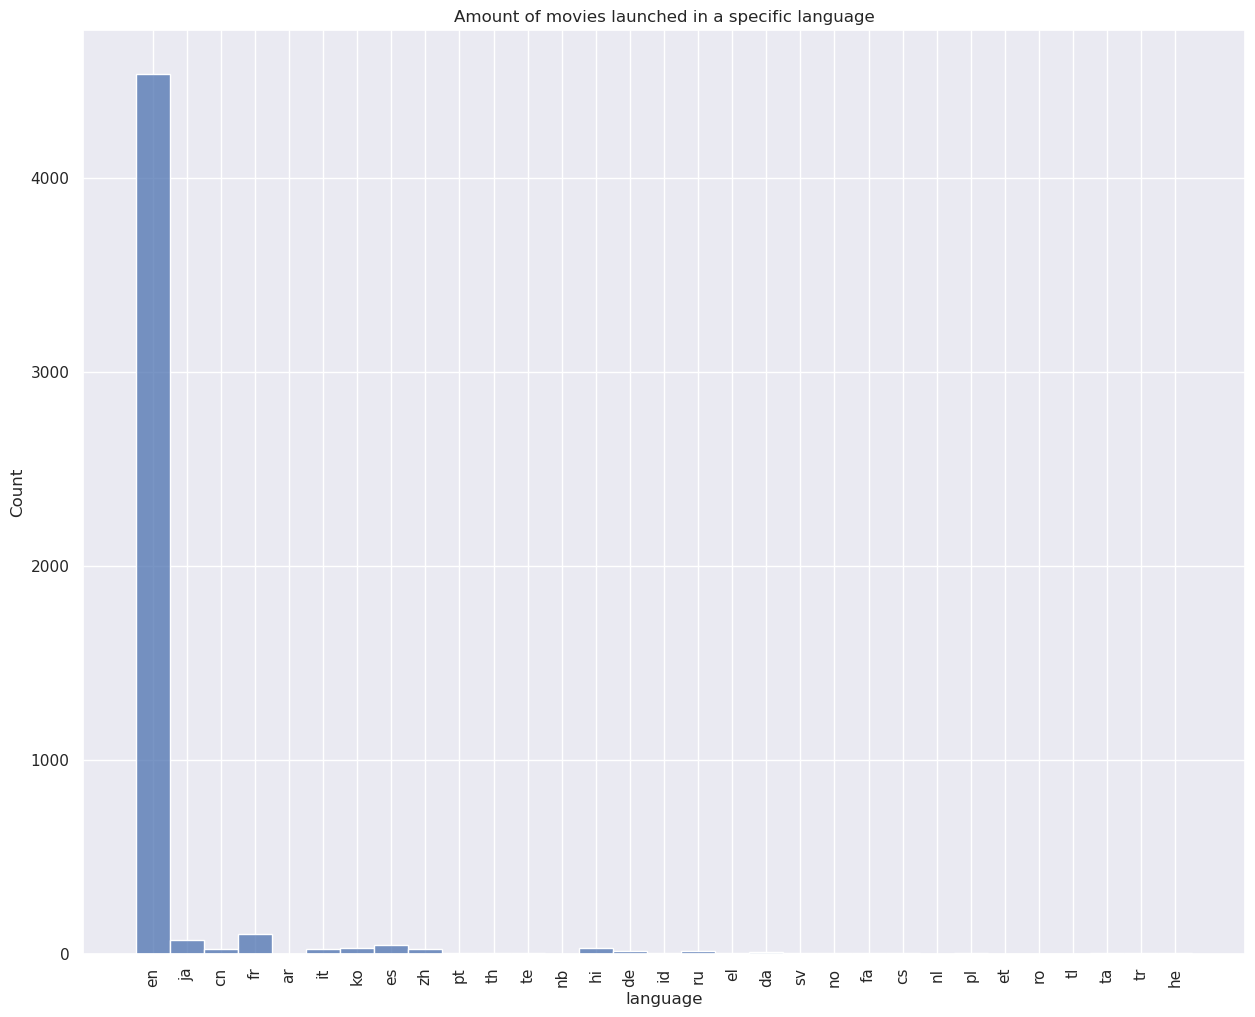

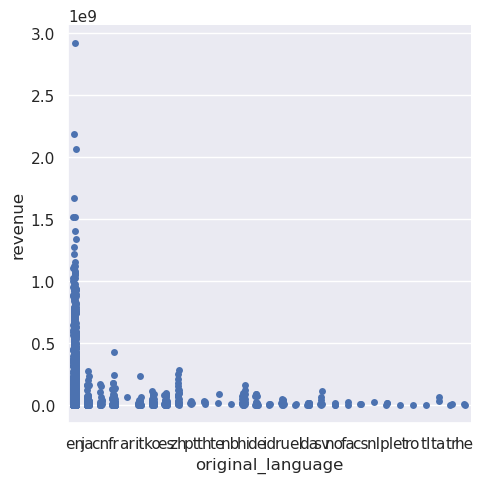

In [140]:
#Langues et recette

plt.figure(figsize=(15,12)) 
sns.histplot(movies_df['original_language'])
plt.xticks(rotation=90)
plt.xlabel('language')
plt.title('Amount of movies launched in a specific language')

#Améliorer lisibilité
sns.catplot(x='original_language',y='revenue',data=movies_df)



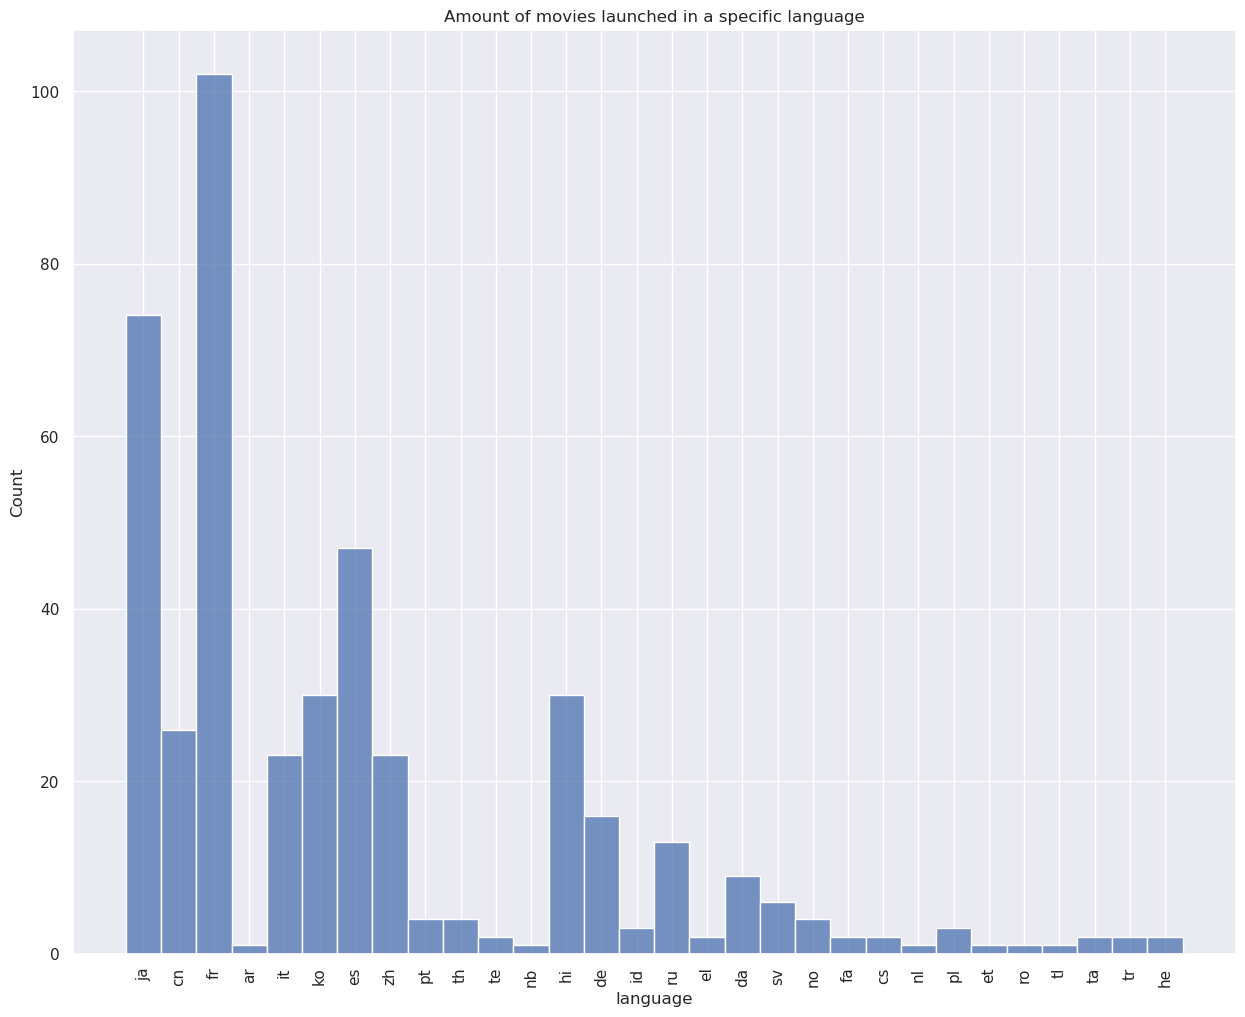

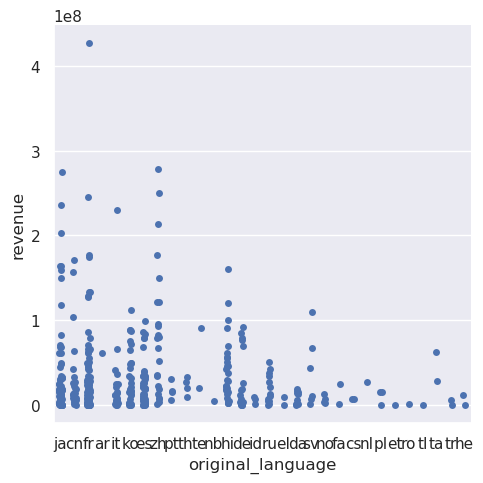

In [139]:
#En enlevant les films en anglais
movies_df2 = movies_df.copy()
indexNames = movies_df2[movies_df2['original_language'] == 'en' ].index
movies_df2.drop(indexNames , inplace=True)

plt.figure(figsize=(15,12)) 
sns.histplot(movies_df2['original_language'])
plt.xticks(rotation=90)
plt.xlabel('language')
plt.title('Amount of movies launched in a specific language')

#Améliorer lisibilité
sns.catplot(x='original_language',y='revenue',data=movies_df2)

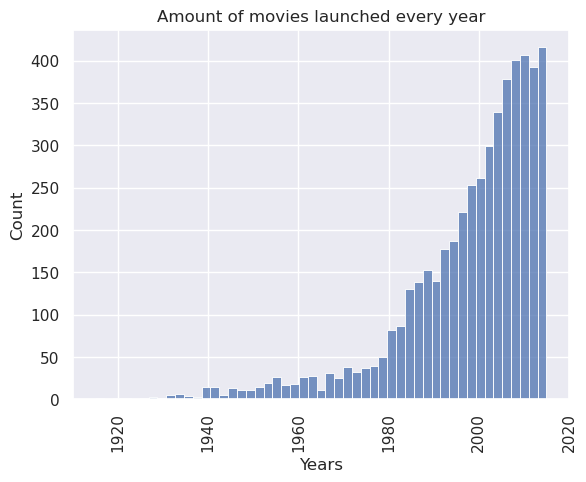

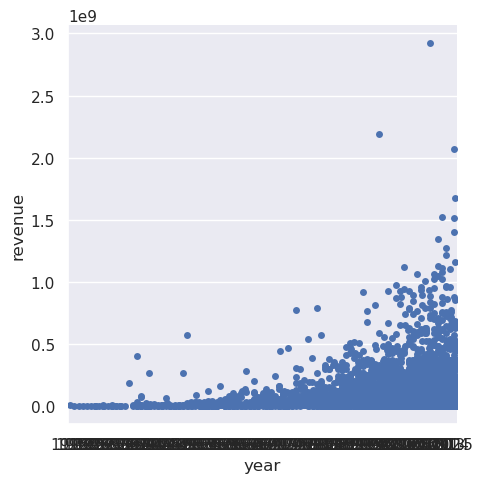

In [104]:
#Nombre de films sortis par an
movies_df['date'] = pd.to_datetime(movies_df['release_date'],format='%Y-%m-%d')
movies_df['year'] = pd.DatetimeIndex(movies_df['date']).year

sns.histplot(movies_df['year'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Amount of movies launched every year')

sns.catplot(x='year',y='revenue',data=movies_df)


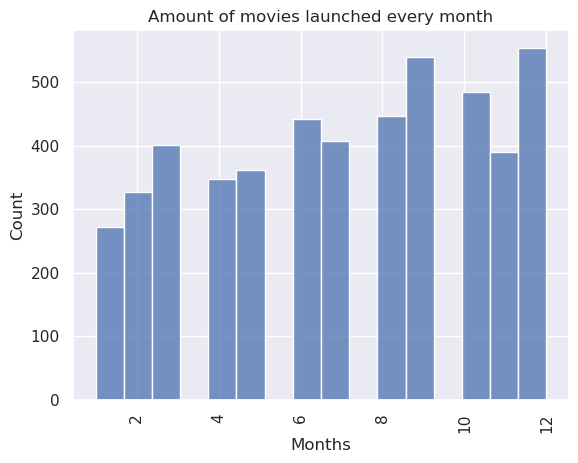

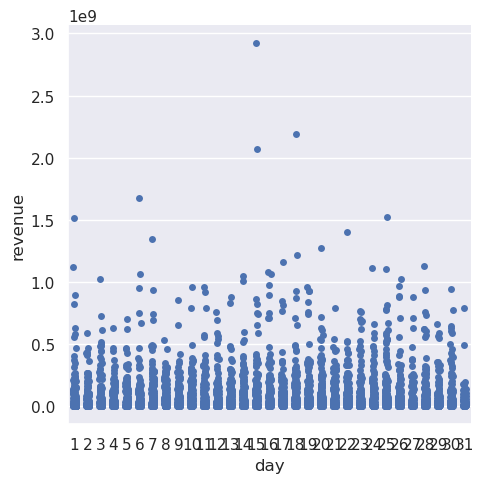

In [103]:
#Nombre de films sortis par mois

movies_df['date'] = pd.to_datetime(movies_df['release_date'],format='%Y-%m-%d')
movies_df['month'] = pd.DatetimeIndex(movies_df['date']).month

sns.histplot(movies_df['month'])
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('Amount of movies launched every month')

sns.catplot(x='day',y='revenue',data=movies_df)

TypeError: 'NoneType' object is not iterable

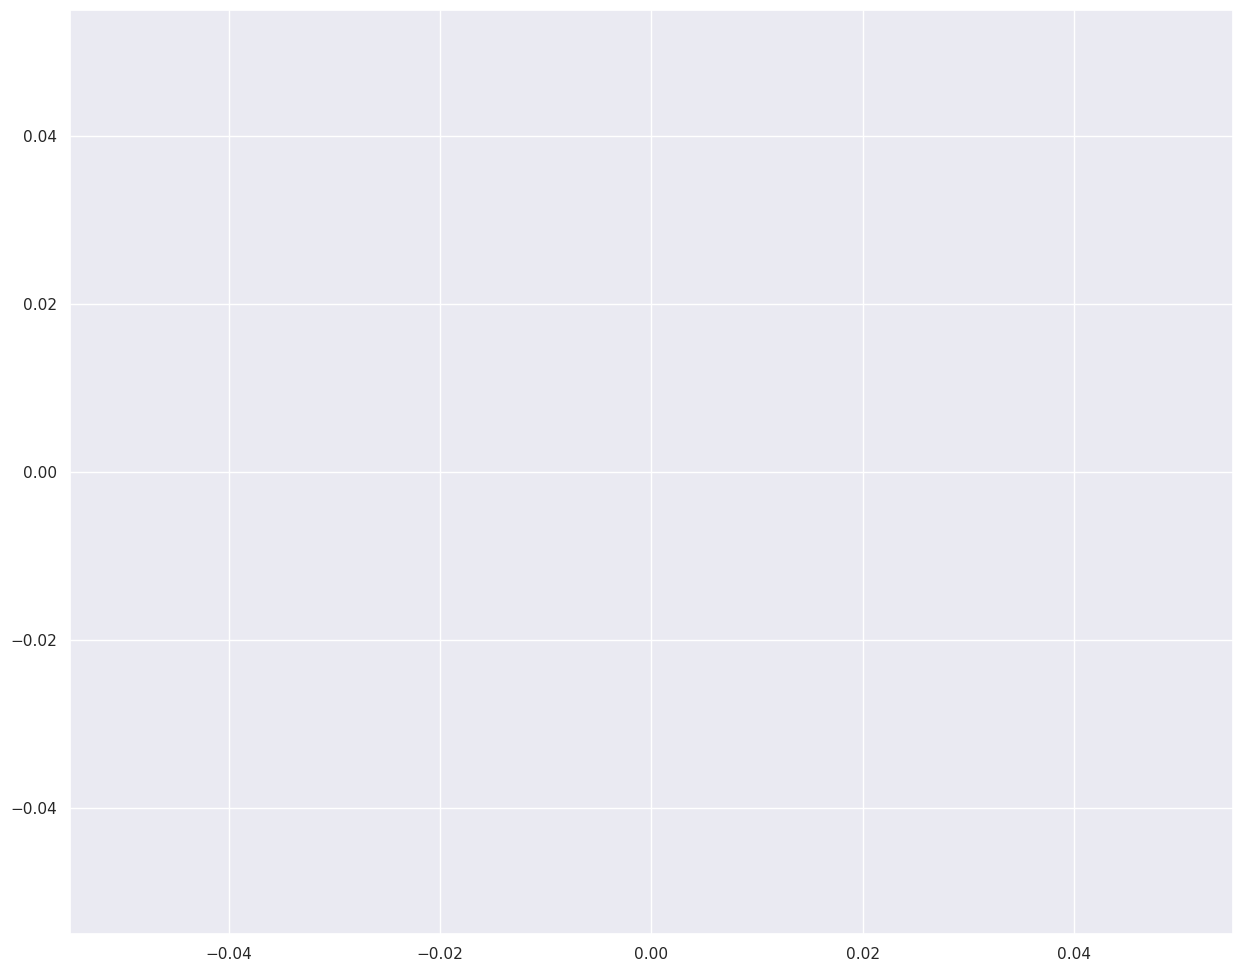

In [138]:
plt.figure(figsize=(15,12)) 
sns.histplot(movies_df['genres'])
plt.xticks(rotation=90)
plt.xlabel('genre')
plt.title('Amount of movies launched in a specific genre')

#Améliorer lisibilité
sns.catplot(x='genres',y='revenue',data=movies_df2)

In [136]:
#nettoyer production country
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(x='production_country',y='revenue',data=movies_df)

ValueError: Could not interpret value `production_country` for parameter `x`

In [80]:
#WORDCLOUD Probleme importation

movies_df_bigrev = movies_df.query('revenue >= 1.039066e+08')
print(movies_df_bigrev.shape)

plt.figure(figsize = (12, 12))
text = ' '.join(movies_df_bigrev['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

(1244, 14)


NameError: name 'WordCloud' is not defined

<Figure size 1200x1200 with 0 Axes>